In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_63343/4245898435.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year', 
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data


approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)


# Sort the DataFrame for correct group-wise comparison
approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS)
148,All-Pairs Shortest Paths (APSP),"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999,5.5,0,2.0,additive,no,NaN
149,All-Pairs Shortest Paths (APSP),"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000,5.33,0,2.0,additive,no,NaN
150,All-Pairs Shortest Paths (APSP),"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000,5.01,0,3.0,additive,yes,NaN
151,All-Pairs Shortest Paths (APSP),"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000,5.01,4,0.0,multiplicative,no,NaN
152,All-Pairs Shortest Paths (APSP),"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022,5.29,0,2.0,additive,no,NaN
...,...,...,...,...,...,...,...,...,...,...
419,NaN,NaN,BRANCH-TIGHT,2019,NaN,NaN,NaN,NaN,NaN,NaN
420,NaN,NaN,RING,2019,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,NaN,RING-ML,2019,NaN,NaN,NaN,NaN,NaN,NaN
422,NaN,NaN,MULTI-SOL,2019,NaN,NaN,NaN,NaN,NaN,NaN


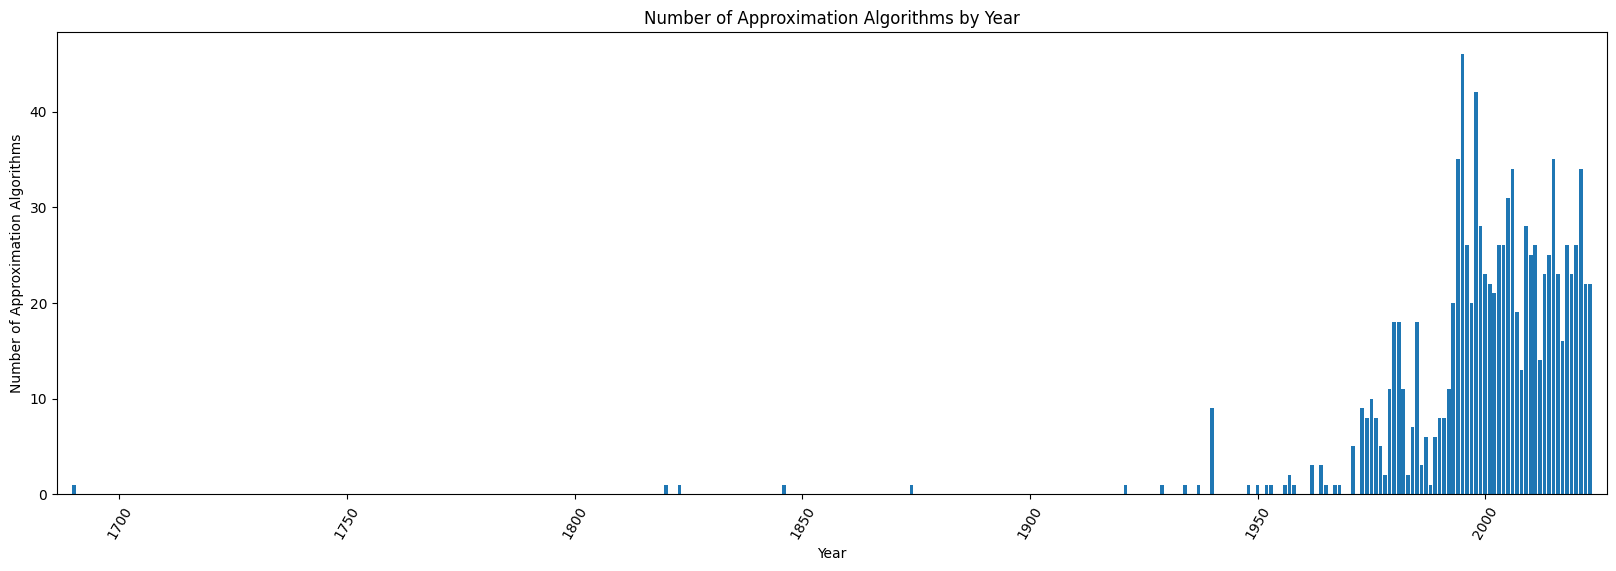

In [3]:
# Plot number of approximation algorithms by year
data = approximation_algorithms

data = data.groupby(['Year']).size()

fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

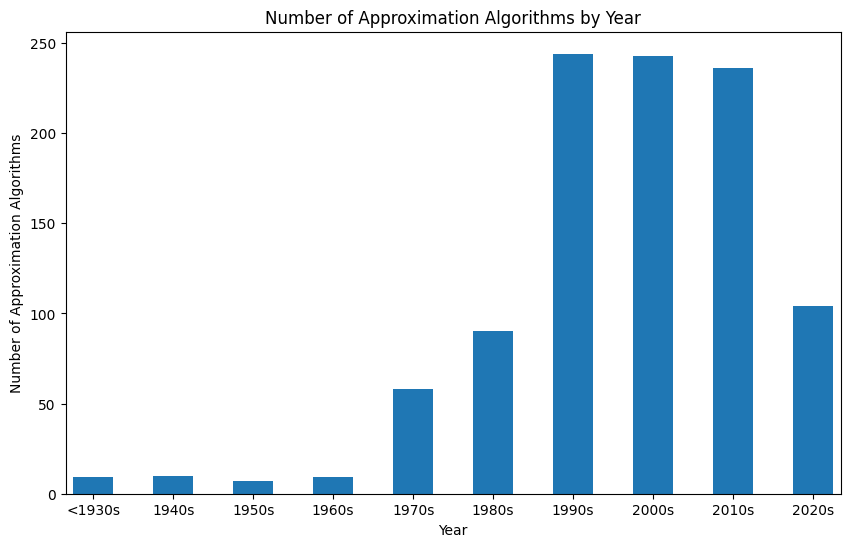

In [4]:
# Plot number of approximation algorithms by decade
data = approximation_algorithms

data = data.groupby(data['Year'] // 10 * 10).size()

# merge all year <= 1930 into 1930
data[1930] = data.loc[:1930].sum()
data = data.drop(data.loc[:1929].index)







fig, ax = plt.subplots()

bar_container = ax.bar(data.index, data.values, width=5)

# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)



ax.set_xticks(data.index)
ax.set_xticklabels(['<1930s'] + [str(year) + 's' for year in data.index[1:]])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

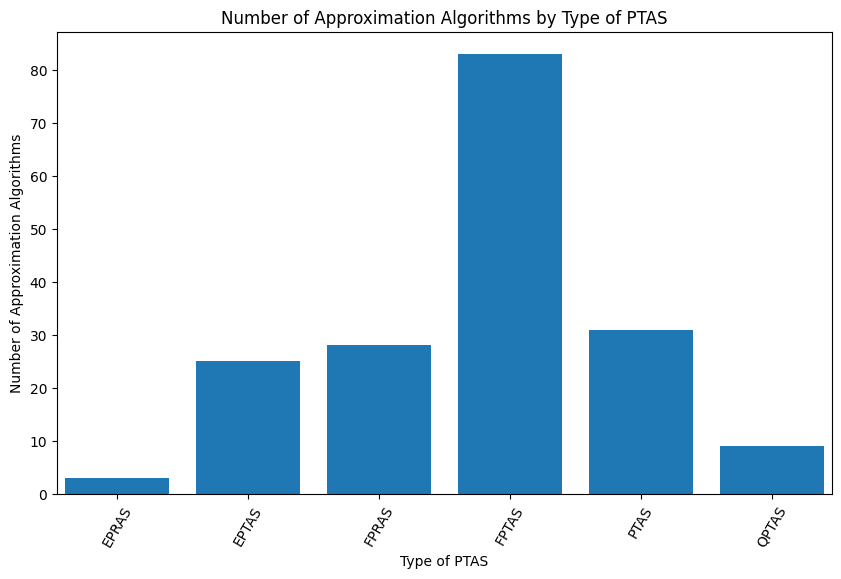

In [5]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# drop 'n/a' values
data = data[data['Type of PTAS (if PTAS)'] != 'n/a']

data = data.groupby(['Type of PTAS (if PTAS)']).size()

fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Type of PTAS')

ax.set_ylabel('Number of Approximation Algorithms')

ax.set_title('Number of Approximation Algorithms by Type of PTAS')

plt.show()

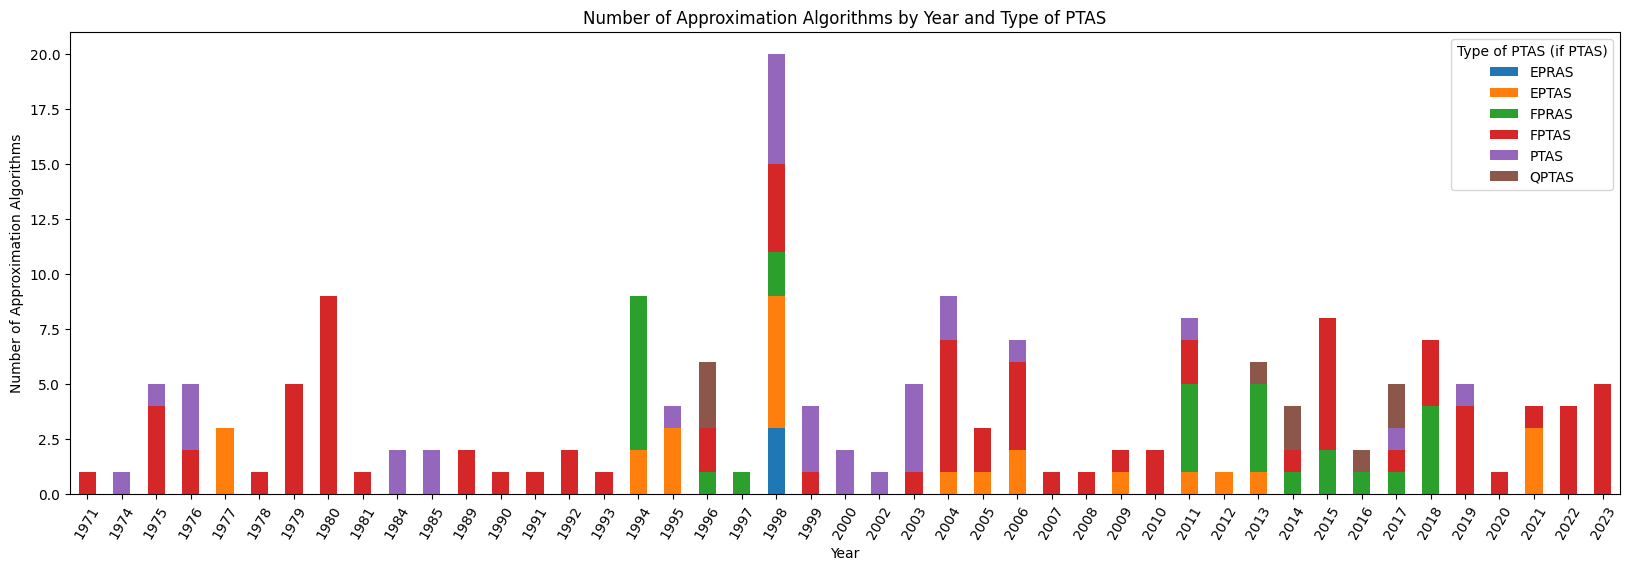

In [6]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')
data = data[data['Type of PTAS (if PTAS)'] != 'n/a']

data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

data = data.unstack()



# plot type of PTAS by year
fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



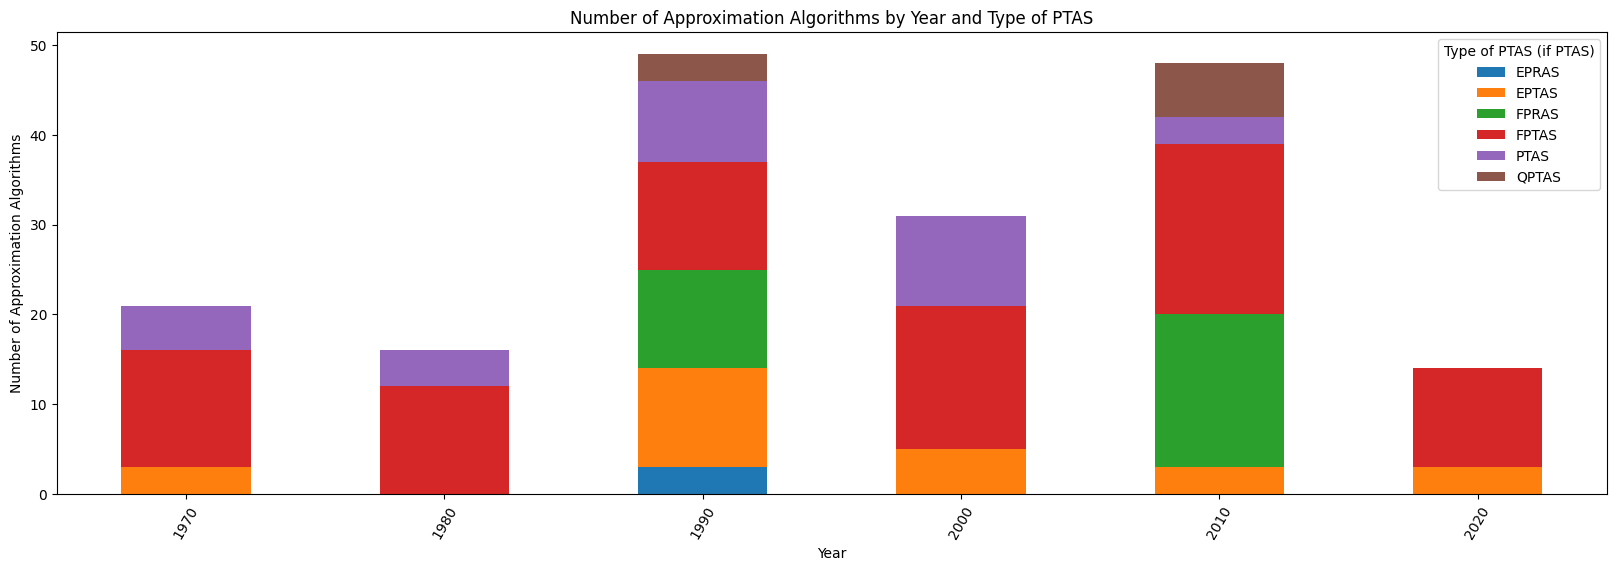

In [7]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')
data = data[data['Type of PTAS (if PTAS)'] != 'n/a']

data = data.groupby([data['Year'] // 10 * 10, 'Type of PTAS (if PTAS)']).size()



# plot type of PTAS by year
fig, ax = plt.subplots()

data.unstack().plot(kind='bar', stacked=True, ax=ax)





# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()



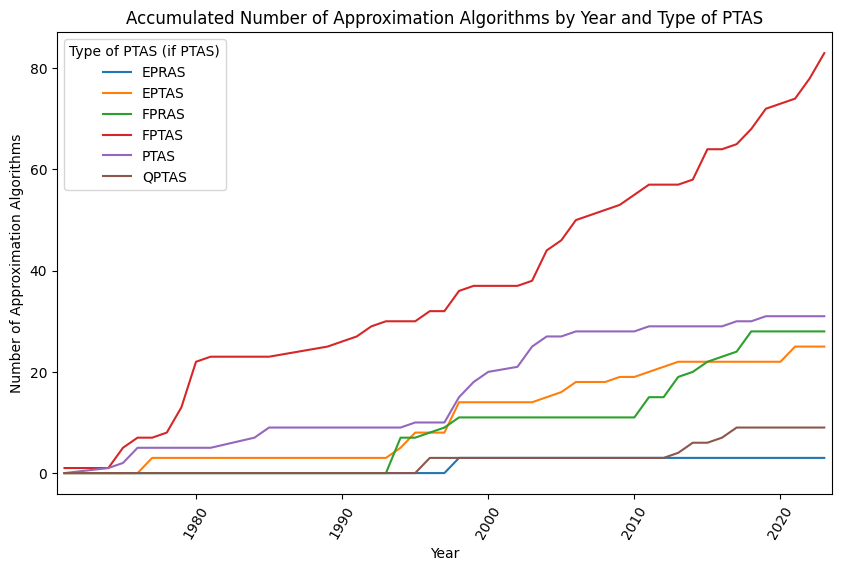

In [8]:
# Plot accumulated number of approximation algorithms by year
data = approximation_algorithms

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')
data = data[data['Type of PTAS (if PTAS)'] != 'n/a']

ptas_type_count_per_year = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size().unstack(fill_value=0)

# accumulated number of each type of PTAS per year
ptas_type_count_per_year = ptas_type_count_per_year.cumsum()

fig, ax = plt.subplots()
ptas_type_count_per_year.plot(kind='line', ax=ax)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Accumulated Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()





/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_63343/1351801307.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels)


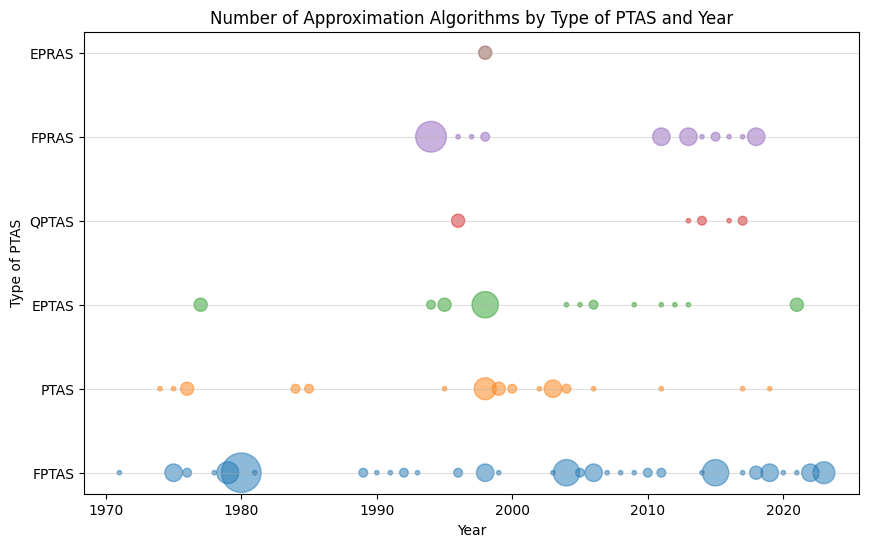

In [9]:
data = approximation_algorithms
# type of PTAS throughout time drop nan values
data = data[data['Type of PTAS (if PTAS)'] != 'n/a']
types_of_ptas = data['Type of PTAS (if PTAS)'].dropna().unique()

# count of each type of PTAS by year
data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()
data = data.unstack(fill_value=0)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 6)
ax.grid(axis='y', alpha=0.4)
ylabels = [""]
for i, ptas_type in enumerate(types_of_ptas):
    ylabels.append(ptas_type)

for i, ptas_type in enumerate(types_of_ptas):
    x = data.index
    y = np.full_like(x, i)
    s = data[ptas_type].values
    ax.scatter(x, y, s=10*s**2, alpha=0.5, label=ptas_type)


ax.set_yticklabels(ylabels)
ax.set_xlabel('Year')
ax.set_ylabel('Type of PTAS')
ax.set_title('Number of Approximation Algorithms by Type of PTAS and Year')


# plt.legend(title='Type of PTAS')
plt.show()
